## Data exploring

Setup

In [83]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

In [84]:
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=["date"], index_col="date")
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


#### Cleaning data 2.5% bottom and 2.5% top

In [85]:
mask = (df["value"] >= df["value"].quantile(0.025)) & (
    df["value"] <= df["value"].quantile(0.975)
)
df = df[mask]

## Draw plot

<function matplotlib.pyplot.show(close=None, block=None)>

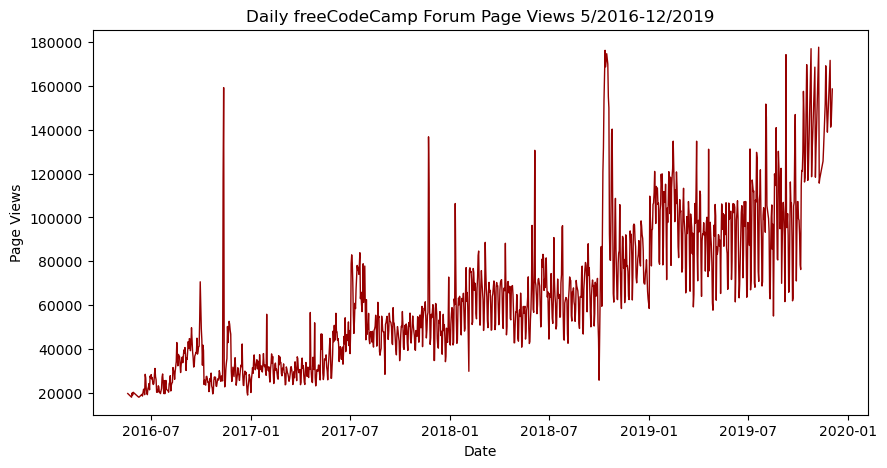

In [86]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df.value, color='#960000', linewidth=1)

ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_ylabel("Page Views")
ax.set_xlabel("Date")
plt.show

## Bars plot

In [87]:
df["month"] = df.index.month
df["year"] = df.index.year

df_bars = df.groupby(["year", "month"])["value"].mean()
df_bars = df_bars.unstack()

df_bars


month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


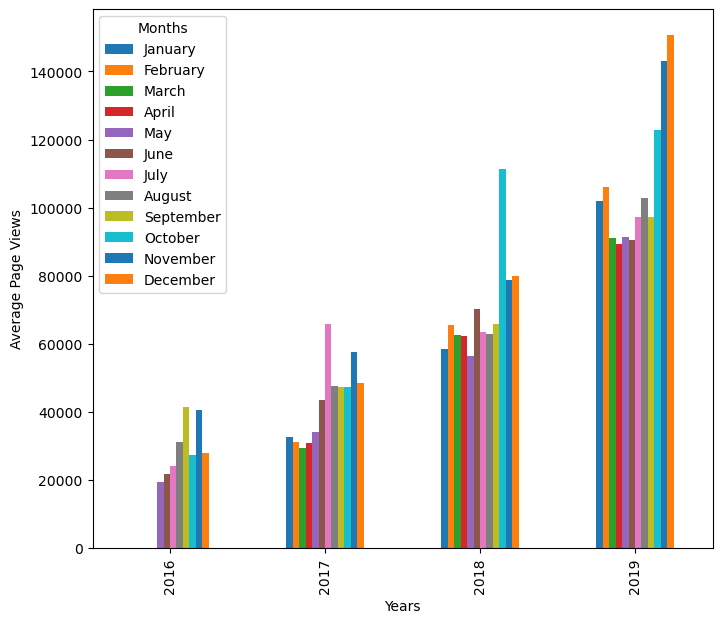

In [96]:
fig = df_bars.plot.bar(
    legend=True, xlabel="Years", ylabel="Average Page Views", figsize=(8, 7)
)
plt.legend(
    [
        "January",
        "February",
        "March",
        "April",
        "May",
        "June",
        "July",
        "August",
        "September",
        "October",
        "November",
        "December",
    ],
    title="Months",
)